In [1]:
from google.colab import files
a = files.upload()

Saving amazon_alexa.tsv to amazon_alexa.tsv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv("amazon_alexa.tsv", sep="\t")

In [5]:
data.head(7)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1


In [6]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [7]:
for i in data.columns:
  print("number of unique values in ", i, "is = ", len(np.unique(data[i])))

number of unique values in  rating is =  5
number of unique values in  date is =  77
number of unique values in  variation is =  16
number of unique values in  verified_reviews is =  2301
number of unique values in  feedback is =  2


In [8]:
data.shape

(3150, 5)

In [9]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [10]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [12]:
data.drop(labels="date",axis=1,inplace=True)

In [13]:
data.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['variation'] = le.fit_transform(data['variation'])

In [15]:
data.head()

,rating,variation,verified_reviews,feedback
0,5,5,Love my Echo!,1
1,5,5,Loved it!,1
2,4,10,"Sometimes while playing a game, you can answer...",1
3,5,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,5,Music,1


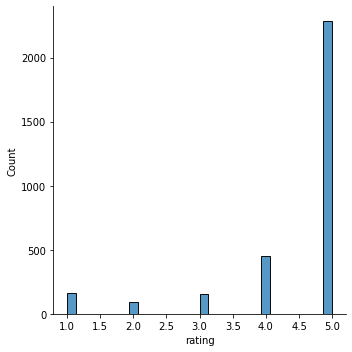

In [16]:
sns.displot(data,x='rating',legend=True)

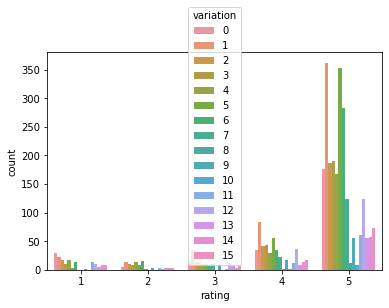

In [17]:
sns.countplot(x='rating',hue='variation',data=data)

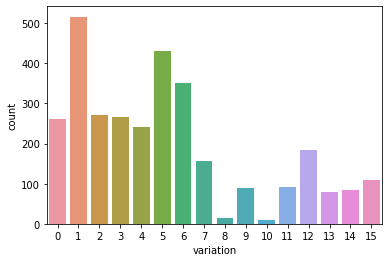

In [18]:
sns.countplot(x='variation',data=data)

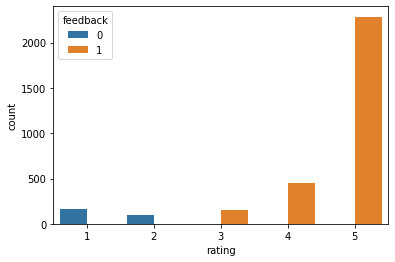

In [21]:
sns.countplot(x='rating',hue='feedback',data=data)

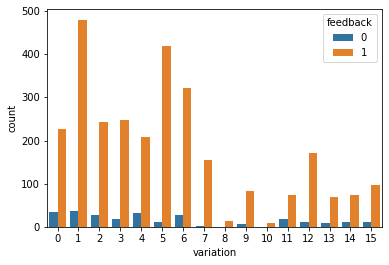

In [22]:
sns.countplot(x='variation',hue='feedback',data=data)

In [23]:
data.drop(labels=['variation','rating'],axis=1, inplace=True)

In [24]:
total_value = len(data['feedback'])
positive_comment = []
negative_comment = []

for i in data['feedback']:
  if i == 1:
    positive_comment.append(data['feedback'])
  else:
    negative_comment.append(data['feedback'])

print(len(positive_comment), len(negative_comment))
percent_of_positive_comment = (len(positive_comment)/total_value)*100
percent_of_negative_comment = (len(negative_comment)/total_value)*100

print("percentage of positive comment = ", percent_of_positive_comment,"%")
print("percentage of negative comment = ", percent_of_negative_comment,"%")

2893 257
percentage of positive comment =  91.84126984126985 %
percentage of negative comment =  8.158730158730158 %


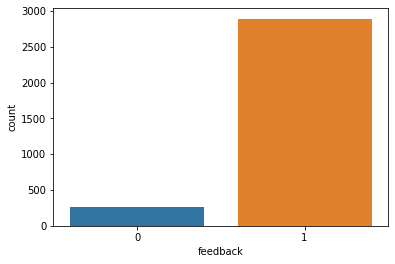

In [25]:
sns.countplot(x='feedback',data=data)

In [26]:
x = data['verified_reviews']
y = data['feedback']

In [27]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [28]:
tokenizer = Tokenizer(15212, lower=True, oov_token='UNK')
tokenizer.fit_on_texts(x)

In [29]:
x = tokenizer.texts_to_sequences(x)

In [30]:
from keras.preprocessing.sequence import pad_sequences

In [32]:
x_pad = pad_sequences(x,maxlen=80, padding='post')
x_pad[0]

array([11,  8, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int32)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pad,y,test_size=0.33,random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
random_classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', class_weight={0:6, 1: 1})
random_classifier.fit(x_train, y_train)
y_train_predict = random_classifier.predict(x_train)
y_pred = random_classifier.predict(x_test)
print(y_pred[0],y_train_predict[0])

1 1


In [36]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.9115384615384615


In [38]:
def review_bot(feedback):
  sentence_list=[]
  sentence_list.append(feedback)
  sentence_seq=tokenizer.texts_to_sequences(sentence_list)
  sentence_padded = pad_sequences(sentence_seq,maxlen=80,padding='post')
  ans = random_classifier.predict(sentence_padded)
  if ans.all() == 1:
    print("positive feedback")
  else:
    print("negative feedback")
review_bot(str(input("Enter a text : ")))

Enter a text : i love google colab for NLP tasks.
positive feedback
